# Introduction

## Goal. 
The goal of this lab is to continue the investigations of Evolutionary Algorithms (EAs) we started in the previous module's exercises. In particular, you will observe the effects of crossover, selection pressure, and population size in artificial evolution, and reflect to what extent these observations also apply to biological evolution.

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous lab. If you did not participate in the previous lab, you may want to look that over first and then start this lab's exercises.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

# Exercise 1

In this exercise we will analyze the effect of crossover in the EA. An offspring individual is formed from two parent individuals $\mathbf{x}_1$ and $\mathbf{x}_2$ by randomly taking the value for each entry $x_i$ either from $\mathbf{x}_1$ or $\mathbf{x}_2$. The EA has a parameter defining the fraction of offspring that is created using crossover at each generation (the remaining individuals are created via asexual reproduction).

To start the experiments, run the next cell$^{[1]}$.

This script executes $30$ runs using mutation only (as in the previous exercises), and $30$ runs using crossover only. The boxplots compare the best fitness values obtained in the two cases.

- Do you see any difference between the two results? Why?
in tutti i casi provati, solo mutazione ha una variabilità molto minore (osservando il boxplot), questo perchè introduce meno variabilità nei risultati e infatti si fissa molto di più sullo staring point e non riesce ad allotanarsi troppo, mentre usando il cross over riusciamo ad ottenere valori molto più vicini al minimo globale.
Nel secondo esperimento ho aumentato il tasso di mutazione ed infatti siamo riusiti a trovare dei risultati più vicini al minimo ma comunque il crosssover resta il migliore
---
[1]: 
For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results. 


-------------------------------------------------------------
run1 {'gaussian_stdev': 1.0, 'tournament_size': 2, 'num_elites': 2, 'pop_size': 20, 'max_generations': 50}


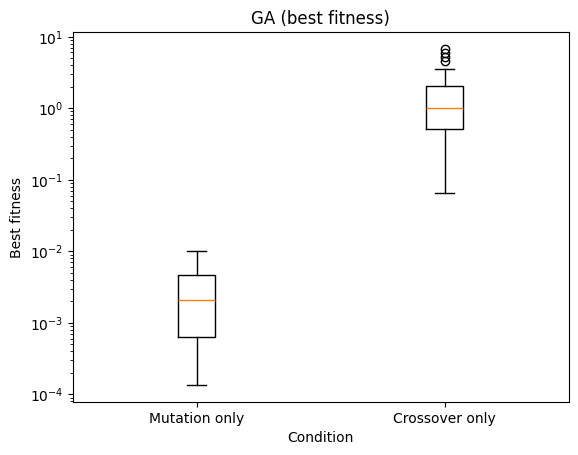

best fitness crossover: 6.729685831286693
best fitness mutation: 0.003966074779238421


In [1]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
seed = None
rng = Random(seed)
runs={'run1':{"gaussian_stdev":1.0,
              "tournament_size":2,
              "num_elites":2,
              "pop_size":20,
              "max_generations":50}}
for run in runs:
    print('-------------------------------------------------------------')
    print(run, runs[run])
    # parameters for the GA
    args = {}
    args["num_vars"] = 2 # Number of dimensions of the search space
    args["gaussian_stdev"] = runs[run]['gaussian_stdev'] # Standard deviation of the Gaussian mutations
    args["tournament_size"] = runs[run]["tournament_size"] 
    args["num_elites"] = runs[run]["num_elites"] # number of elite individuals to maintain in each gen
    args["pop_size"] = runs[run]["pop_size"] # population size
    args["pop_init_range"] = [-10, 10] # Range for the initial population
    args["max_generations"] = runs[run]["max_generations"] # Number of generations of the GA

    #num_runs = 1 # Number of runs to be done for each condition
    #display = True # Plot initial and final populations --> if True set num_runs = 1 

    num_runs = 30
    display = False
    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'

    
    # Only mutation, no crossover
    crossover_rate = 0 # Crossover fraction    
    mutation_rate = 1.0 # fraction of loci to perform mutation on

    # run the GA *num_runs* times and record the best fits
    best_fitnesses_mutation_only = [run_ga(rng, display=display, 
                                        crossover_rate=crossover_rate,
                                        mutation_rate=mutation_rate,
                                        **args)[1]
                                    for _ in range(num_runs)]

    if display and (args["num_vars"] == 1 or args["num_vars"]==2) and num_runs == 1:
        print('Mutation Only')
        print('Best fitness:', best_fitnesses_mutation_only[0])

        show()


    # Only crossover, no mutation
    mutation_rate = 0.0 # fraction of loci to perform mutation on
    crossover_rate = 1.0 # Crossover fraction  

    # run the GA *num_runs* times and record the best fits 
    best_fitnesses_crossover_only = [run_ga(rng, display=display, 
                                        crossover_rate=crossover_rate,
                                        mutation_rate=mutation_rate,
                                        **args)[1]
                                    for _ in range(num_runs)]

    if display and (args["num_vars"] == 1 or args["num_vars"]==2) and num_runs == 1:
        print('Crossover Only')
        print('Best fitness:', best_fitnesses_crossover_only[0])
        show()

    #if not display or num_runs > 1:
    fig = figure('GA (best fitness)')
    ax = fig.gca()
    ax.boxplot([best_fitnesses_mutation_only, best_fitnesses_crossover_only],
            notch=False)
    ax.set_xticklabels(['Mutation only', 'Crossover only'])
    ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    ax.set_title('GA (best fitness)')
    show()

    print('best fitness crossover:',best_fitnesses_crossover_only[0])
    print('best fitness mutation:',best_fitnesses_mutation_only[0])

# Exercise 2

In this exercise we will focus on the effect of changing the fraction of offspring created using crossover. Run the next cell to compare the best fitnesses obtained by varying this fraction (while using a fixed mutation probability of $0.5$, i.e. each loci of each genome will have a $50\%$ chance of being mutated). 

- Is there an optimal crossover fraction for this fitness function? Why?
aumnetatndo il crossover abbiamo un valore della fitness minore, ma se lo aumenti troppo la fitness media risultapiù alta (quindi i risultati peggiorano). Un trade off lo abbiamo tra 1 e 2

------------------------------------------------------------------------------------
run1 {'crossover_rate': [0, 0.1, 0.2]}


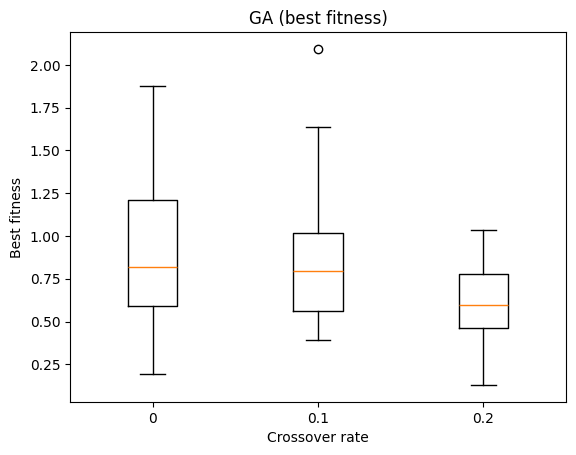

media delle fitness
0.9127608847723965 0.8573226025712903 0.6040033091533272
------------------------------------------------------------------------------------
run2 {'crossover_rate': [0.3, 0.4, 0.5]}


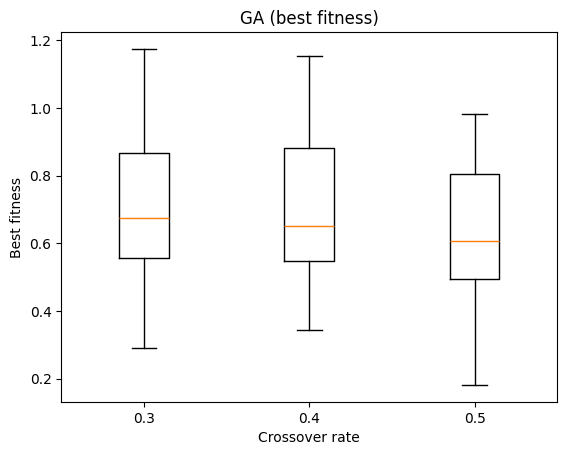

media delle fitness
0.7089856400437136 0.6927265629568503 0.6295066739588775
------------------------------------------------------------------------------------
run3 {'crossover_rate': [0.6, 0.7, 0.8]}


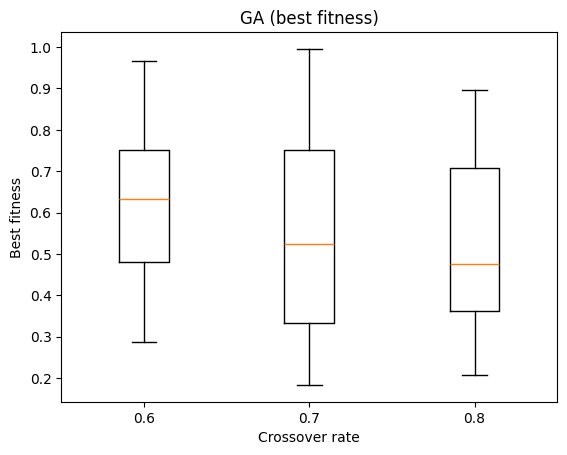

media delle fitness
0.6308312918029735 0.5484765968288652 0.5315712265766491
------------------------------------------------------------------------------------
run4 {'crossover_rate': [0.8, 0.9, 1]}


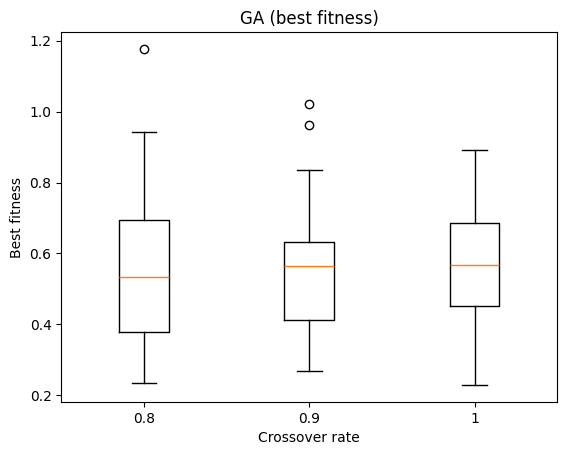

media delle fitness
0.5499426489285806 0.5523616338170012 0.5640599079854148


In [ ]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
seed = None
rng = Random(seed)


runs={'run1':{"crossover_rate":[0, 0.1, 0.2]},
      'run2':{"crossover_rate":[0.3, 0.4, 0.5]},
      'run3':{"crossover_rate":[0.6, 0.7, 0.8]},
      'run4':{"crossover_rate":[0.8, 0.9, 1]}
      }

for run in runs:
      print('------------------------------------------------------------------------------------')
      print(run, runs[run])

      crossover_rates = runs[run]["crossover_rate"] # Crossover fractions  
      # parameters for the GA
      args = {}
      args["num_vars"] = 10 # Number of dimensions of the search space
      args["gaussian_stdev"] = 0.5 # Standard deviation of the Gaussian mutations
      args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on
      args["tournament_size"] = 2 
      args["num_elites"] = 1 # number of elite individuals to maintain in each gen
      args["pop_size"] = 20 # population size
      args["pop_init_range"] = [-10, 10]# Range for the initial population
      args["max_generations"] = 50 # Number of generations of the GA


      #num_runs = 1 # Number of runs to be done for each condition 30
      #display = True # Plot initial and final populations False

      num_runs = 30
      display = False 

      """
      -------------------------------------------------------------------------
      """

      args["fig_title"] = 'GA'

      
      # run the GA *num_runs* times for each crossover fraction 
      # and record the best fits 
      if not display:
            best_fitnesses = [[run_ga(rng, display=display, 
                                    crossover_rate=crossover_rate,**args)[1] 
                              for _ in range(num_runs)]
                              for crossover_rate in crossover_rates]
      else:
            best_fitnesses = []
            for crossover_rate in crossover_rates:
                  print('Crossover rate:', crossover_rate)
                  best_fitnesses_ = [run_ga(rng, display=display, 
                                    crossover_rate=crossover_rate,**args)[1] 
                              for _ in range(num_runs)]
                  best_fitnesses.append(best_fitnesses_)
                  show()

      fig = figure('GA (best fitness)')
      ax = fig.gca()
      ax.boxplot(best_fitnesses,notch=False)
      ax.set_xticklabels(crossover_rates)
      ax.set_xlabel('Crossover rate')
      ax.set_ylabel('Best fitness')
      ax.set_title('GA (best fitness)')
      show()
      print('media delle fitness')
      print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]),np.mean(best_fitnesses[2]))

# Exercise 3

We will now investigate the effect of the selection pressure. In the previous exercises, we were using tournament selection with a tournament size of 2. Run the next cell to compare the best fitness values and the distances from the global optimum obtained using tournament sizes 2 and 10.

- Which tournament size gives better results for the fitness function sphere and why?
aumentando la tournament size ottengo sempre un valore dell fitness migliore. L'ipersfera è una funzione con un unico minimo e aumentare le torunement size significa aumentare il numero di individui che partecipa al torneo, quindi avere più probabilità di trovare un individuo ancora migliore (in quanto selezioniamo sempre il best child del torneo)
- Which tournament size is better for the fitness function __[Rastrigin](https://pythonhosted.org/inspyred/reference.html?highlight=rastrigin#inspyred.benchmarks.Rastrigin)__ (you can change the problem by changing the parameter `problem_class` in the script) and why?
in questo caso nvece aumnetare la tournement size non mi da risultati migliori. Questo potrebbe succedere perchè Rastrigin è una funzione multimodale, quindi avendo più minimi è più probabile che aumnetando la tournement size facciamo molto exploiatition e poco esploration e quindi ci focalizziamo nel minimo locale più vicino al punto inziiale senza riuscire ad uscire dalla vallata 



---------------------------------------------------
run1 {'tournament_size': [2, 10], 'problem_class': <class 'inspyred.benchmarks.Sphere'>}


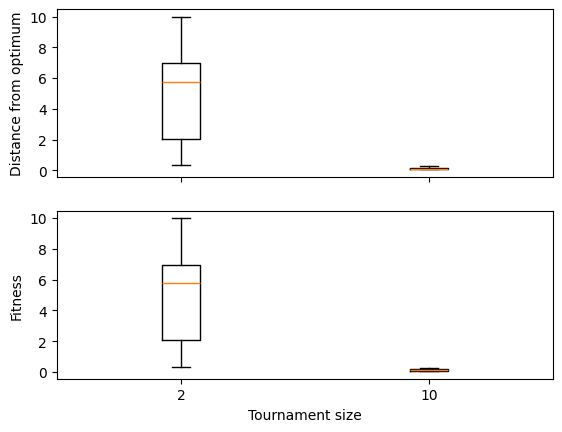

media delle fitness
4.812838416940042 0.13991457938954574
---------------------------------------------------
run2 {'tournament_size': [5, 15], 'problem_class': <class 'inspyred.benchmarks.Sphere'>}


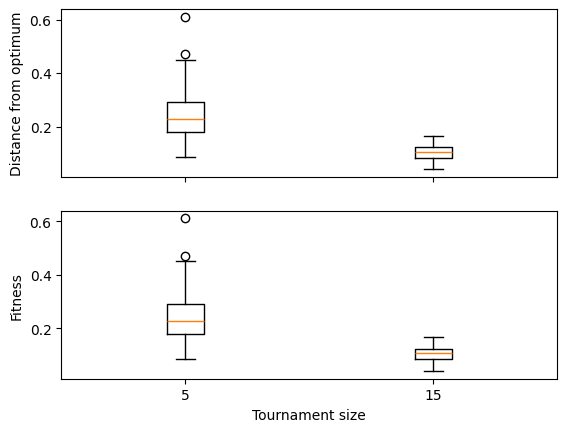

media delle fitness
0.25470538301509565 0.10260858434019754
---------------------------------------------------
run3 {'tournament_size': [10, 20], 'problem_class': <class 'inspyred.benchmarks.Sphere'>}


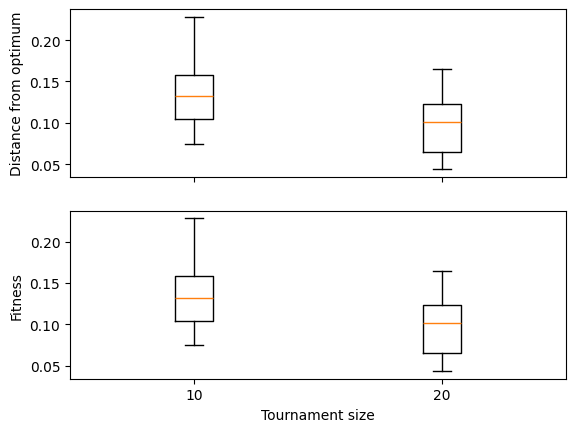

media delle fitness
0.13446230587746627 0.0971229718392598
---------------------------------------------------
run4 {'tournament_size': [15, 25], 'problem_class': <class 'inspyred.benchmarks.Sphere'>}


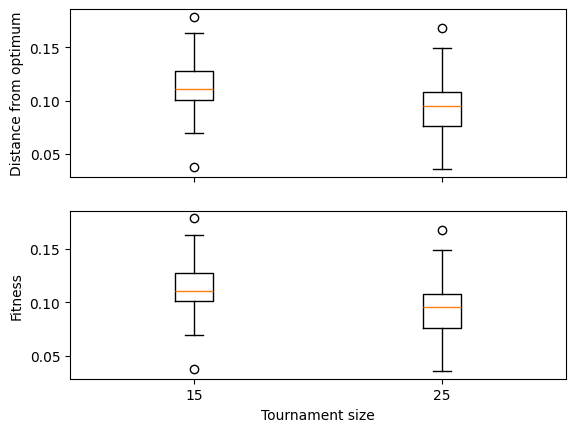

media delle fitness
0.11372611118898343 0.09546359340696327
---------------------------------------------------
run5 {'tournament_size': [2, 10], 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


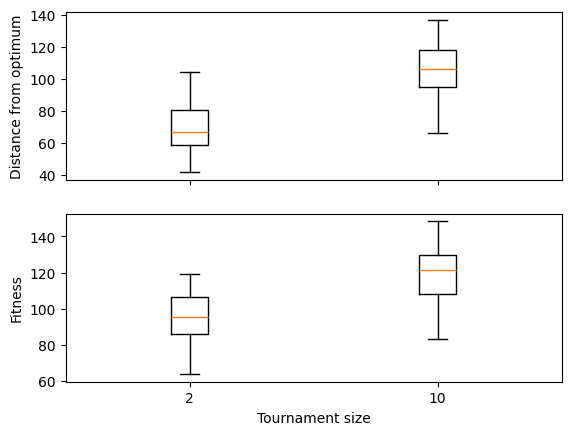

media delle fitness
95.75513555683786 118.84040073314695
---------------------------------------------------
run6 {'tournament_size': [5, 15], 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


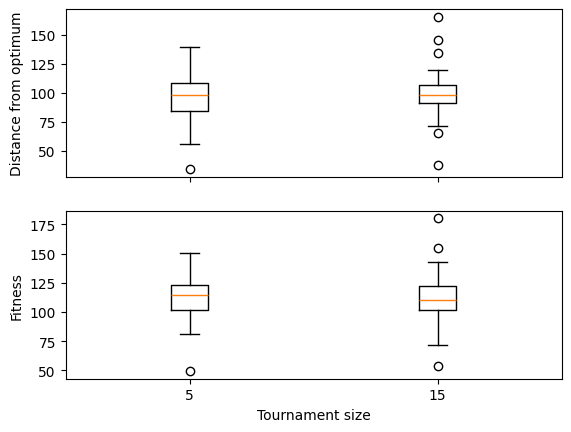

media delle fitness
111.84975766273475 111.68862916588705
---------------------------------------------------
run7 {'tournament_size': [10, 20], 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


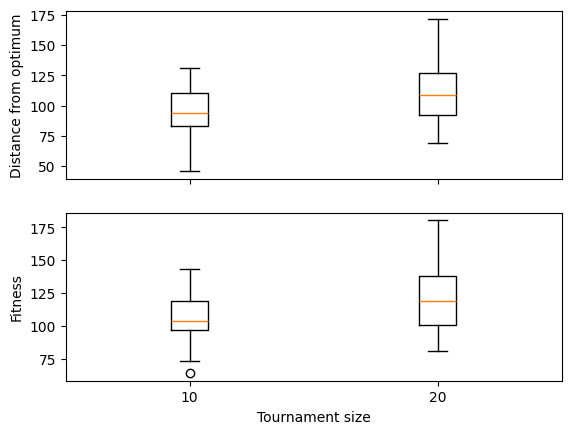

media delle fitness
106.17934373404475 121.4053569899811
---------------------------------------------------
run8 {'tournament_size': [15, 25], 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


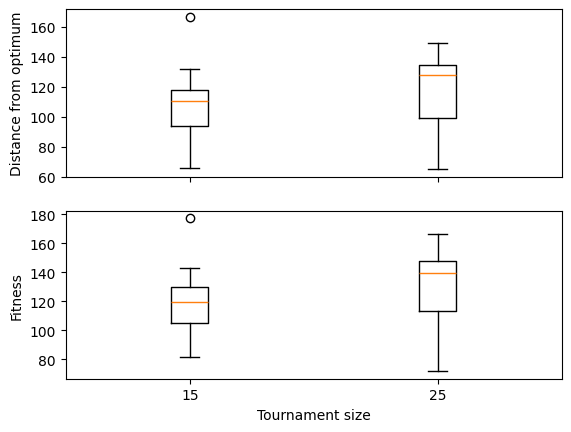

media delle fitness
118.76243070862067 131.656607380153


In [3]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys


seed = None
rng = Random(seed)

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

runs={'run1':{"tournament_size":[2, 10], "problem_class":benchmarks.Sphere},
      'run2':{"tournament_size":[5, 15], "problem_class":benchmarks.Sphere},
      'run3':{"tournament_size":[10, 20], "problem_class":benchmarks.Sphere},
      'run4':{"tournament_size":[15, 25], "problem_class":benchmarks.Sphere},
      'run5':{"tournament_size":[2, 10], "problem_class": benchmarks.Rastrigin},
      'run6':{"tournament_size":[5, 15], "problem_class": benchmarks.Rastrigin},
      'run7':{"tournament_size":[10, 20], "problem_class":benchmarks.Rastrigin},
      'run8':{"tournament_size":[15, 25], "problem_class":benchmarks.Rastrigin},
      }

for run in runs:
       print('---------------------------------------------------')
       print(run, runs[run])
       tournament_sizes = runs[run]["tournament_size"]

       problem_class = runs[run]["problem_class"]

       # parameters for the GA
       args = {}
       args["num_vars"] = 10 # Number of dimensions of the search space
       args["gaussian_stdev"] = 0.2 # Standard deviation of the Gaussian mutations
       args["crossover_rate"]  = 0.0 # Crossover fraction
       args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
       args["num_elites"] = 1 # number of elite individuals to maintain in each gen
       args["pop_size"] = 25 # population size
       args["pop_init_range"] = [-10, 10] # Range for the initial population
       args["max_generations"] = 50 # Number of generations of the GA


       num_runs = 30 # Number of runs to be done for each condition
       display = False # Plot initial and final populations


       #num_runs = 1 # Number of runs to be done for each condition
       #display = True # Plot initial and final populations
       """
       -------------------------------------------------------------------------
       """

       args["fig_title"] = 'GA'


       
       # run the GA *num_runs* times for each crossover fraction 
       # and record results 

       if not display:
              results = asarray([[run_ga(rng, problem_class=problem_class,
                                   display=display, 
                                   tournament_size=tournament_size,**args)
                            for _ in range(num_runs)]
                            for tournament_size in tournament_sizes],dtype=object)
       else:
              results = []
              for tournament_size in tournament_sizes:
                     print('Tournament size:', tournament_size)
                     results_ = [run_ga(rng, problem_class=problem_class,
                                   display=display, 
                                   tournament_size=tournament_size,**args)
                            for _ in range(num_runs)]
                     results.append(results_)
                     show()

       best_fitnesses = [[run_result[1] for run_result in runs] 
                     for runs in results]
       distance_from_global_optimums = [[sum(asarray(run_result[0],dtype=object) ** 2)
                                          for run_result in runs]
                                          for runs in results]

       fig = figure('GA (distance from optimum and best fitness)')
       # Boxplot comparing the distance from the global optimum
       ax = fig.add_subplot(2,1,1)
       ax.boxplot(distance_from_global_optimums,notch=False)
       ax.set_xticklabels([])
       #ax.set_xlabel('Tournament size')
       ax.set_ylabel('Distance from optimum')

       # Boxplot comparing the best fitnesses
       ax = fig.add_subplot(2,1,2)
       ax.boxplot(best_fitnesses,notch=False)
       ax.set_xticklabels(tournament_sizes)
       ax.set_xlabel('Tournament size')
       ax.set_ylabel('Fitness')
       show()
       print('media delle fitness')
       print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]))

# Exercise 4

In this exercise you will run the EA on many test functions commonly used to benchmark optimization algorithms. Run the EA on some of the test functions shown in the comments of the next cell (especially the multimodal functions) and adapt the mutation magnitude, crossover rate, selection pressure, and population size so as to get the best results. If you run the code as provided it will initialize and bound the values of your population vectors to suitable ranges. You may comment/uncomment certain lines to alter this behavior. See the comments in the next cell for further details. 

You may first try the 1D or 2D case, which has the advantage that the fitness landscape can be visualized. However, keep in mind that sometimes the resolution of the plot is not sufficient to accurately represent a function.

- Do you see a different algorithmic behavior when you test the EA on different benchmark functions? Why?
- What is the effect of changing the number of variables on each tested function?


---
[1]:
See __[link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks)__ for a list of single-objective benchmark problems.

-----------------------------------------------
basic Rosenbrock
{'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [1.04711587 1.09622328]
Best Fitness 0.0022251208377925074


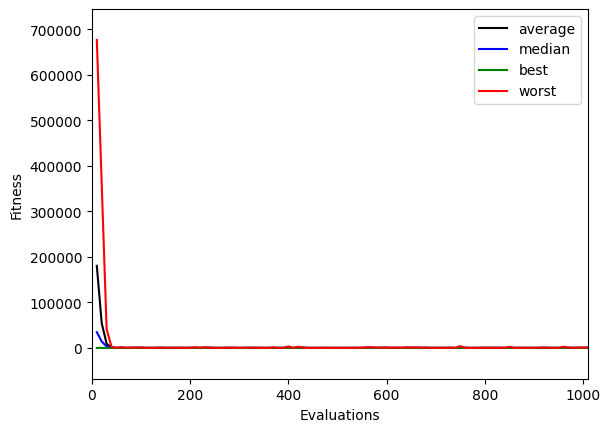

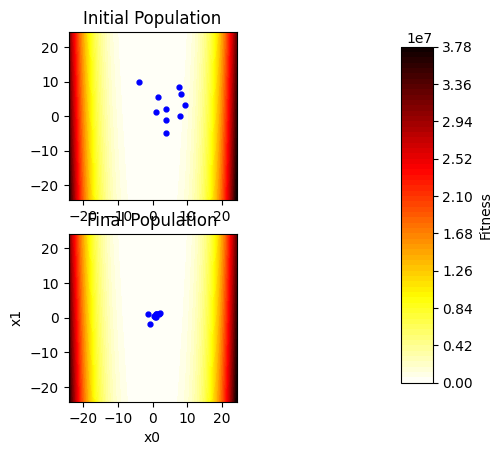

-----------------------------------------------
change crossover rate Rosenbrock
{'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>, 'gaussian_stdev': 1, 'crossover_rate': 0.5, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [-2.50780811  6.37359594]
Best Fitness 13.01864808672212


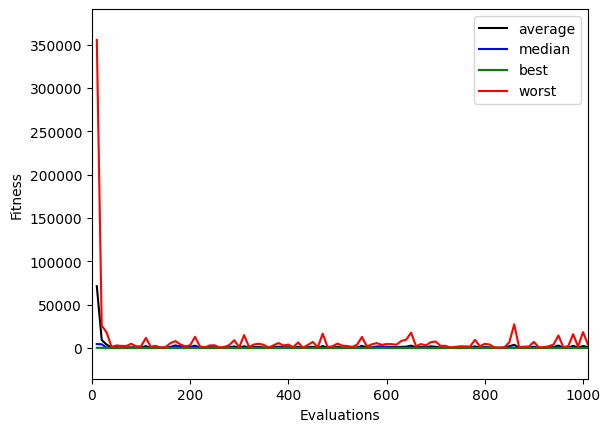

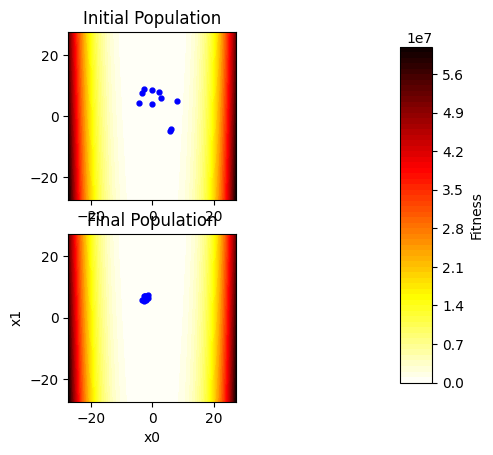

-----------------------------------------------
change tournament_sizes Rosenbrock
{'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 4, 'mutation_rate': 0.5}
Best Individual [-1.45539376  2.1242685 ]
Best Fitness 6.032676465378141


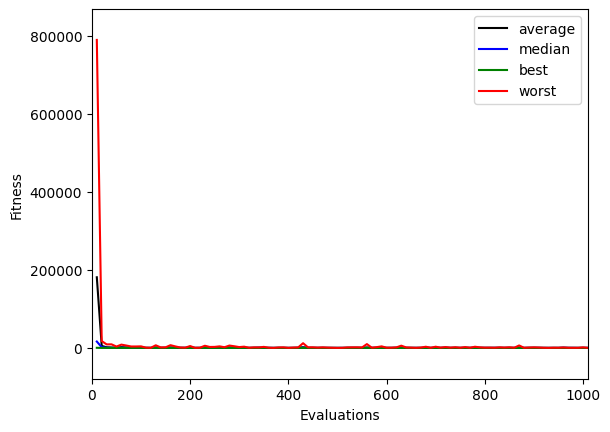

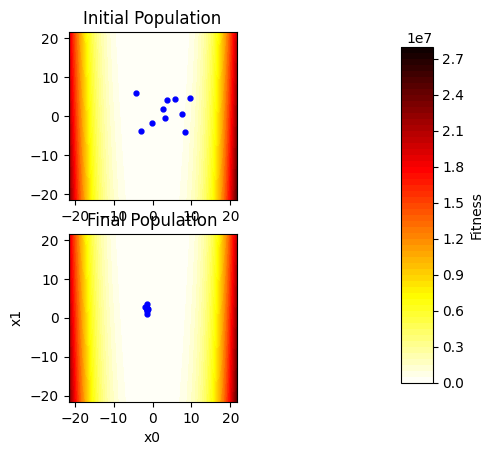

-----------------------------------------------
change mutation_rate Rosenbrock
{'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.8}
Best Individual [1.20778315 1.43461501]
Best Fitness 0.1013760110225894


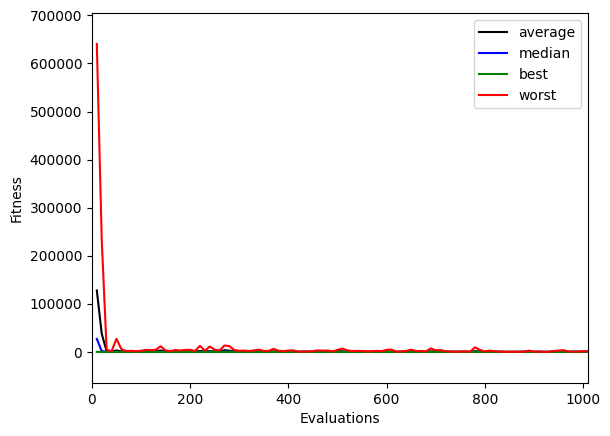

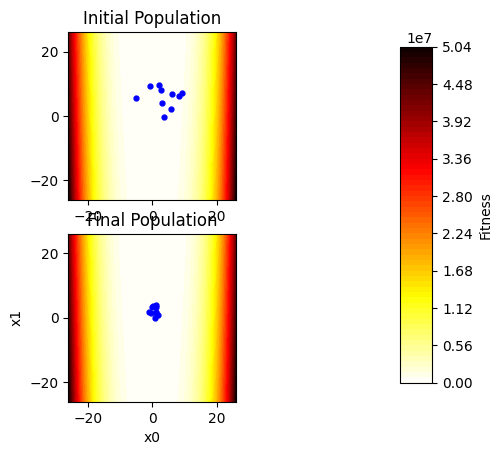

-----------------------------------------------
basic Griewank
{'problem_class': <class 'inspyred.benchmarks.Griewank'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [ 78.48760368 -48.8125267 ]
Best Fitness 2.1379788582474117


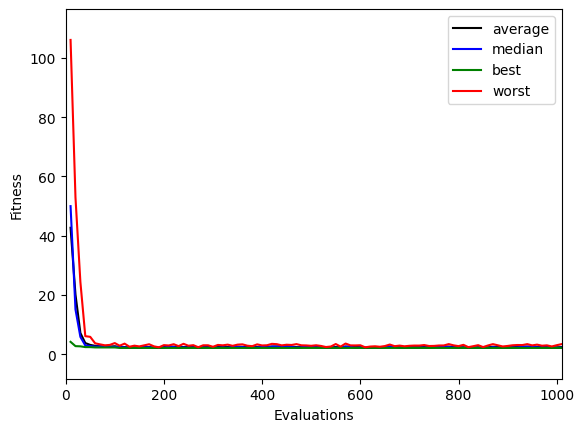

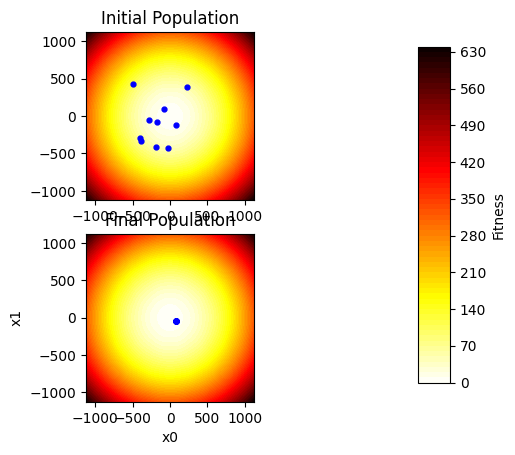

-----------------------------------------------
change crossover rate Griewank
{'problem_class': <class 'inspyred.benchmarks.Griewank'>, 'gaussian_stdev': 1, 'crossover_rate': 0.5, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [ -9.43027827 -48.82516308]
Best Fitness 0.6187634520231493


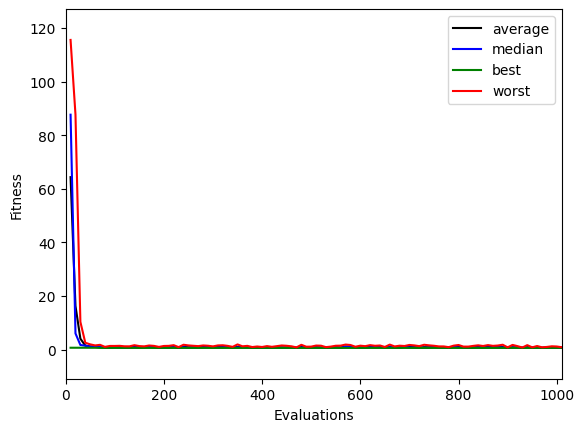

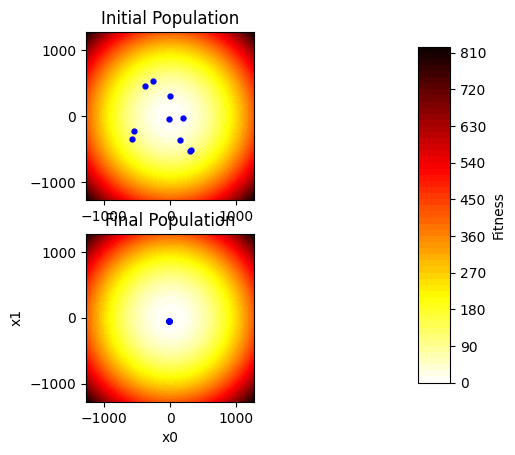

-----------------------------------------------
change tournament_sizes Griewank
{'problem_class': <class 'inspyred.benchmarks.Griewank'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 4, 'mutation_rate': 0.5}
Best Individual [-194.68080092 -133.14861413]
Best Fitness 13.916810354426016


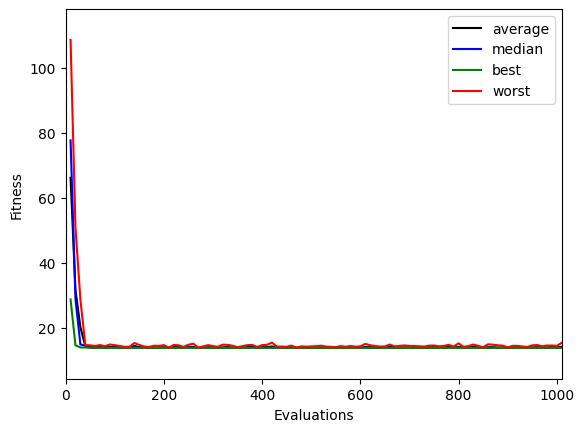

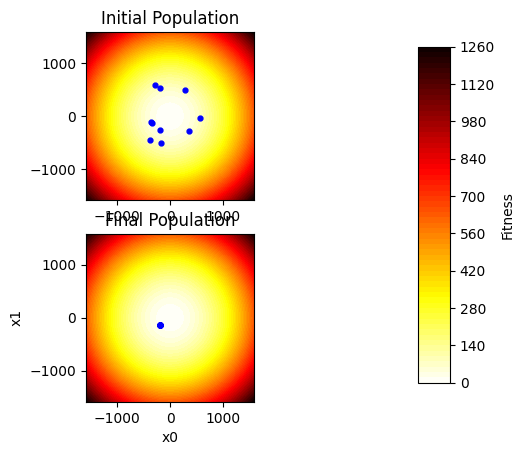

-----------------------------------------------
change mutation_rate Griewank
{'problem_class': <class 'inspyred.benchmarks.Griewank'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.8}
Best Individual [   9.42874004 -110.95636119]
Best Fitness 3.103407094592714


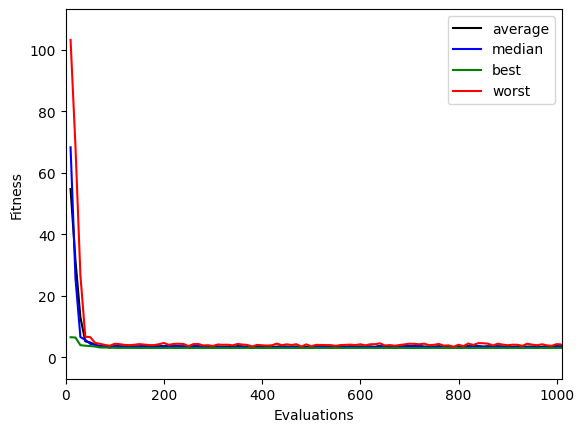

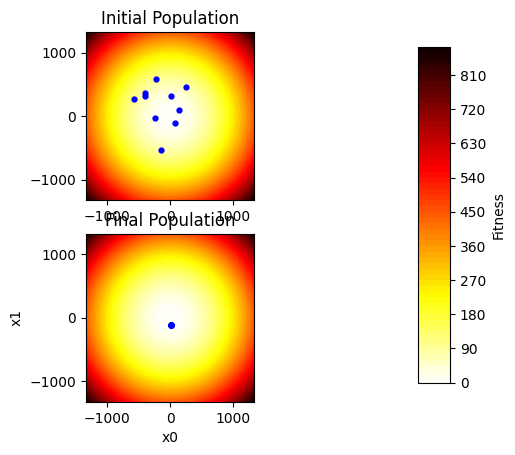

-----------------------------------------------
basic Ackley
{'problem_class': <class 'inspyred.benchmarks.Ackley'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [ 0.02552456 -0.0125778 ]
Best Fitness 0.10191918133547917


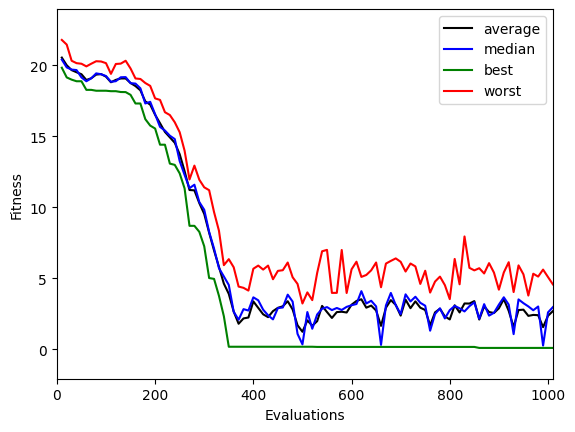

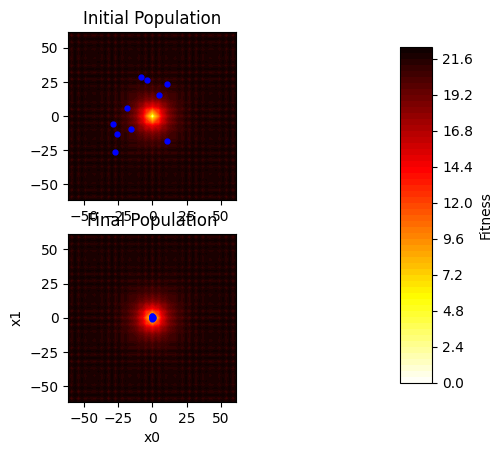

-----------------------------------------------
change crossover rate Ackley
{'problem_class': <class 'inspyred.benchmarks.Ackley'>, 'gaussian_stdev': 1, 'crossover_rate': 0.5, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [0.01288005 0.02887428]
Best Fitness 0.11584929061252724


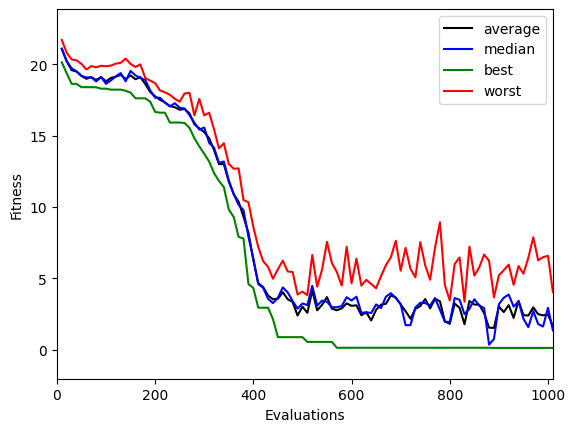

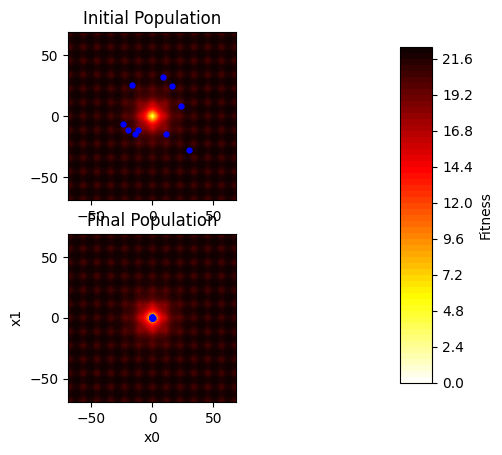

-----------------------------------------------
change tournament_sizes Ackley
{'problem_class': <class 'inspyred.benchmarks.Ackley'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 4, 'mutation_rate': 0.5}
Best Individual [-0.02030513  0.00437703]
Best Fitness 0.07020026535789059


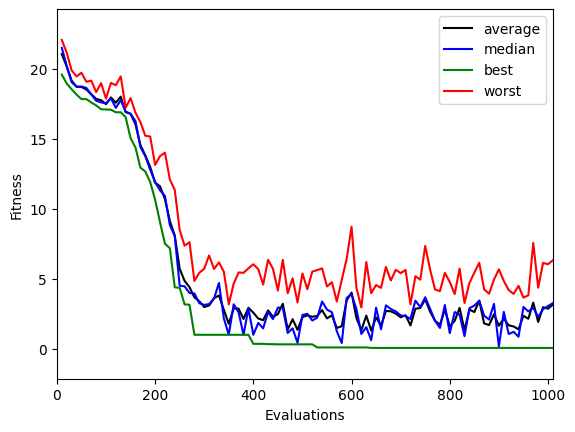

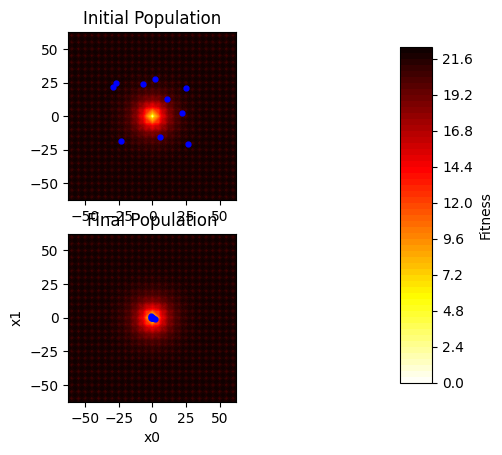

-----------------------------------------------
change mutation_rate Ackley
{'problem_class': <class 'inspyred.benchmarks.Ackley'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.8}
Best Individual [-0.01912209 -0.0032466 ]
Best Fitness 0.06484648801126314


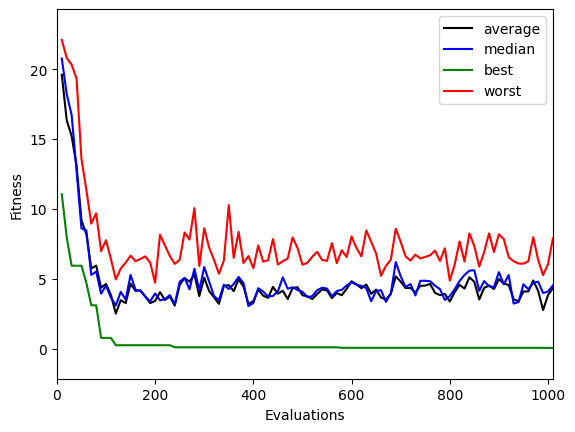

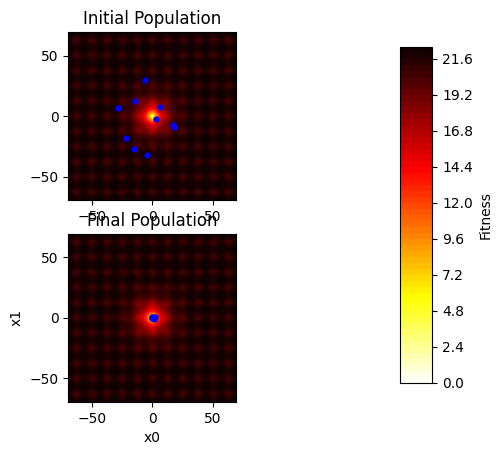

-----------------------------------------------
basic Schwefel
{'problem_class': <class 'inspyred.benchmarks.Schwefel'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [421.03448855 420.98990303]
Best Fitness 0.0006273193782817543


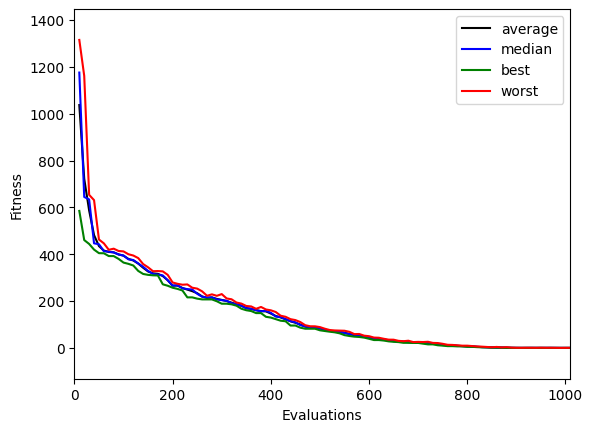

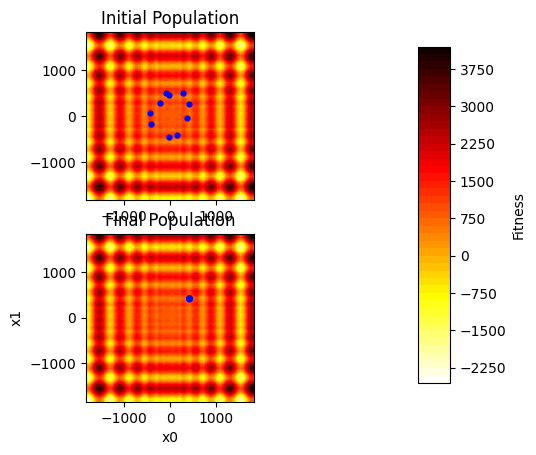

-----------------------------------------------
change crossover rate Schwefel
{'problem_class': <class 'inspyred.benchmarks.Schwefel'>, 'gaussian_stdev': 1, 'crossover_rate': 0.5, 'tournament_size': 2, 'mutation_rate': 0.5}
Best Individual [ 420.9663332  -302.52796875]
Best Fitness 118.43836196950133


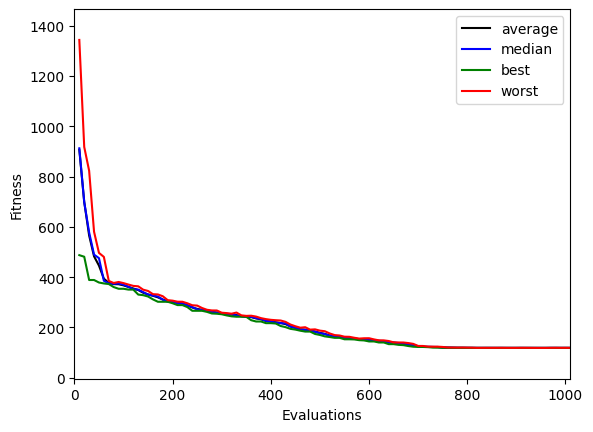

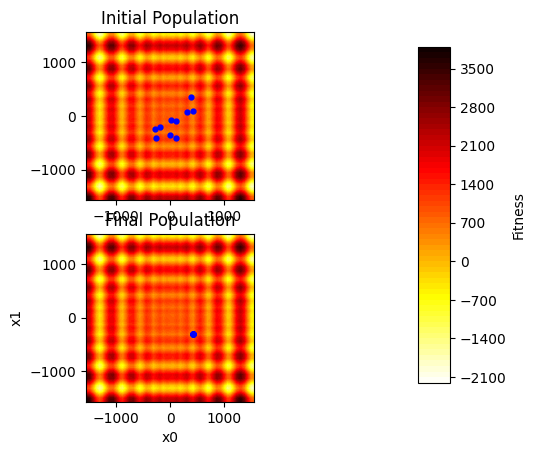

-----------------------------------------------
change tournament_sizes Schwefel
{'problem_class': <class 'inspyred.benchmarks.Schwefel'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 4, 'mutation_rate': 0.5}
Best Individual [-302.52527119   65.54792686]
Best Fitness 473.78626540521714


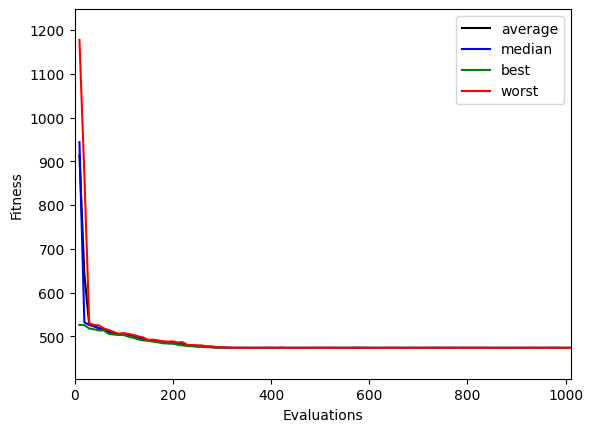

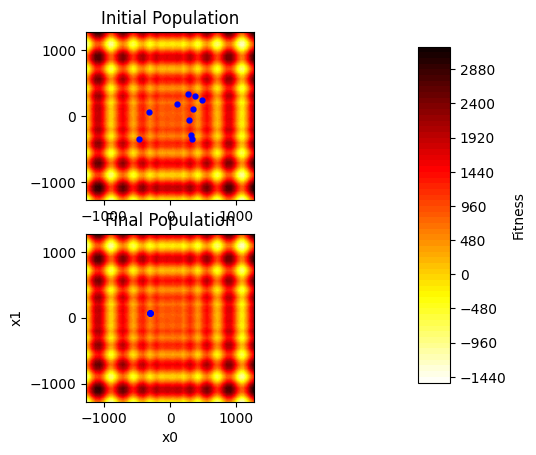

-----------------------------------------------
change mutation_rate Schwefel
{'problem_class': <class 'inspyred.benchmarks.Schwefel'>, 'gaussian_stdev': 1, 'crossover_rate': 0.8, 'tournament_size': 2, 'mutation_rate': 0.8}
Best Individual [420.97257611 420.99328423]
Best Fitness 0.000103282562122331


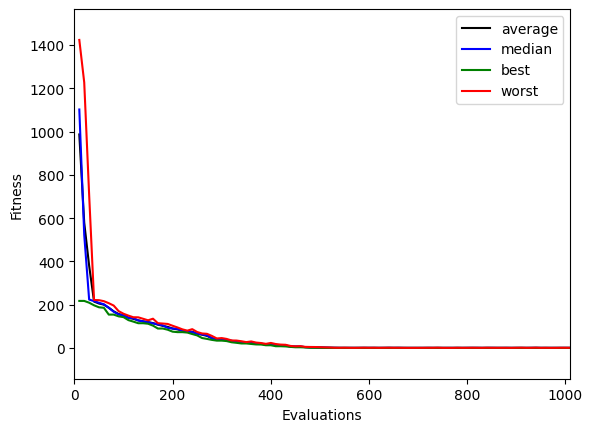

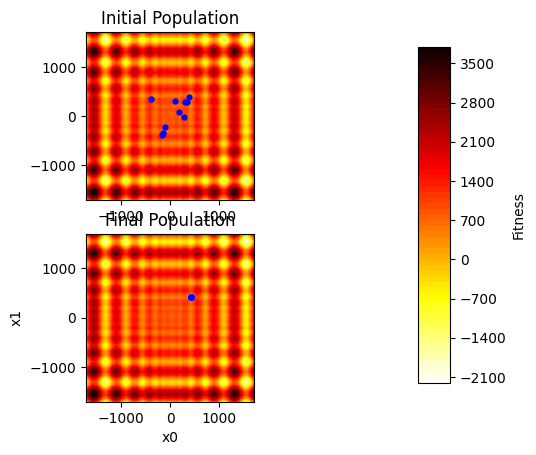

{<class 'inspyred.benchmarks.Rosenbrock'>: [0.0022251208377925074, 13.01864808672212, 6.032676465378141, 0.1013760110225894], <class 'inspyred.benchmarks.Griewank'>: [2.1379788582474117, 0.6187634520231493, 13.916810354426016, 3.103407094592714], <class 'inspyred.benchmarks.Ackley'>: [0.10191918133547917, 0.11584929061252724, 0.07020026535789059, 0.06484648801126314], <class 'inspyred.benchmarks.Schwefel'>: [0.0006273193782817543, 118.43836196950133, 473.78626540521714, 0.000103282562122331]}


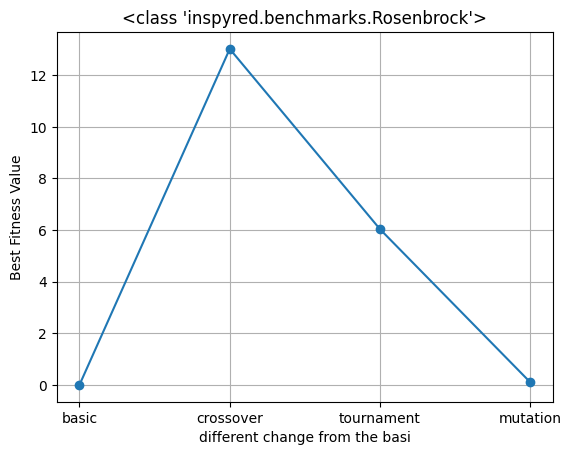

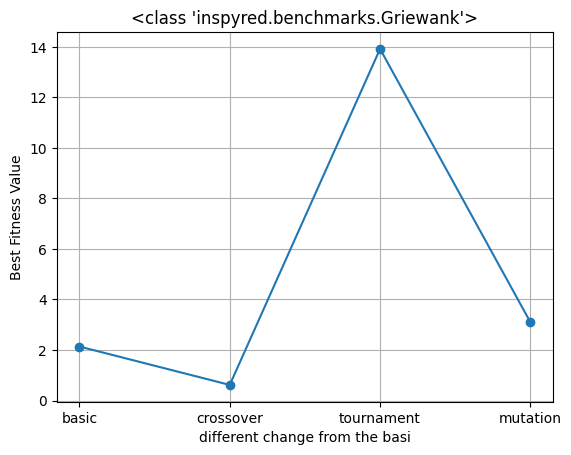

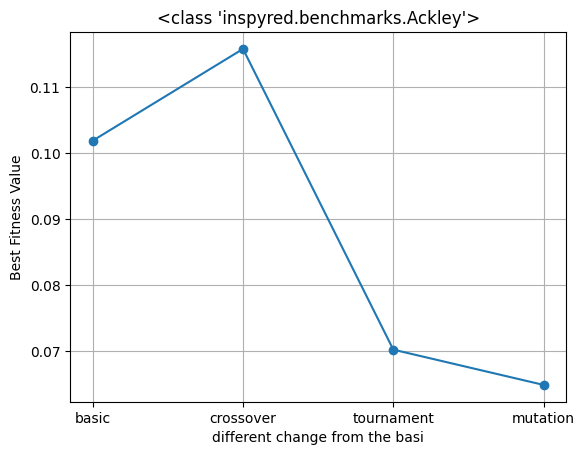

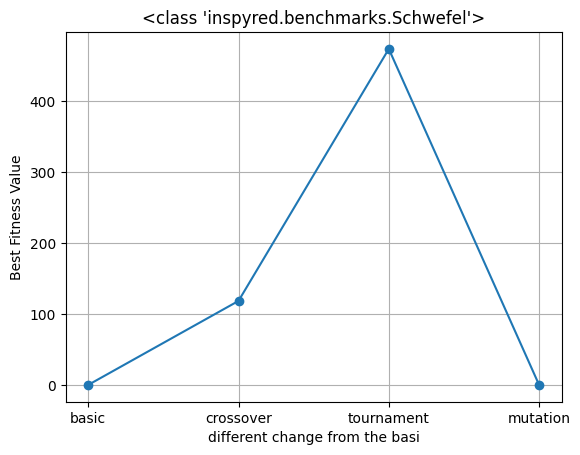

In [4]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys


seed = None
rng = Random(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

runs = {
    'basic Rosenbrock': [benchmarks.Rosenbrock, 1, 0.8, 2, 0.5],
    'change crossover rate Rosenbrock': [ benchmarks.Rosenbrock, 1, 0.5, 2, 0.5],
    'change tournament_sizes Rosenbrock': [ benchmarks.Rosenbrock, 1, 0.8, 4, 0.5],
    'change mutation_rate Rosenbrock': [ benchmarks.Rosenbrock, 1, 0.8, 2, 0.8],
    'basic Griewank': [ benchmarks.Griewank, 1, 0.8, 2, 0.5],
    'change crossover rate Griewank': [ benchmarks.Griewank, 1, 0.5, 2, 0.5],
    'change tournament_sizes Griewank': [ benchmarks.Griewank, 1, 0.8, 4, 0.5],
    'change mutation_rate Griewank': [ benchmarks.Griewank, 1, 0.8, 2, 0.8],
    'basic Ackley': [ benchmarks.Ackley, 1, 0.8, 2, 0.5],
    'change crossover rate Ackley': [ benchmarks.Ackley, 1, 0.5, 2, 0.5],
    'change tournament_sizes Ackley': [ benchmarks.Ackley, 1, 0.8, 4, 0.5],
    'change mutation_rate Ackley': [ benchmarks.Ackley, 1, 0.8, 2, 0.8],
    'basic Schwefel': [ benchmarks.Schwefel, 1, 0.8, 2, 0.5],
    'change crossover rate Schwefel': [ benchmarks.Schwefel, 1, 0.5, 2, 0.5],
    'change tournament_sizes Schwefel': [ benchmarks.Schwefel, 1, 0.8, 4, 0.5],
    'change mutation_rate Schwefel': [ benchmarks.Schwefel, 1, 0.8, 2, 0.8]
}

        

solutions = {}

for run in runs:
    print('-----------------------------------------------')
    print(run)
    # parameters for the GA
    args = {}
    args["num_vars"] = 2 # Number of dimensions of the search space
    args["gaussian_stdev"] = runs[run][1] # Standard deviation of the Gaussian mutations
    args["crossover_rate"]  = runs[run][2] # Crossover fraction
    args["tournament_size"] = runs[run][3] 
    args["pop_size"] = 10 # population size
    args["num_elites"] = 1 # number of elite individuals to maintain in each gen
    args["mutation_rate"] = runs[run][4] # fraction of loci to perform mutation on
    #args["pop_init_range"]=[-100,100]

    # by default will use the problem's defined init_range
    # uncomment the following line to use a specific range instead
    #args["pop_init_range"] = [-500, 500] # Range for the initial population
    args["use_bounder"] = True # use the problem's bounder to restrict values
    # comment out the previously line to run unbounded
    args["max_generations"] = 100 # Number of generations of the GA
    display = True # Plot initial and final populations

    # choose problem
    problem_class = runs[run][0]

    print({"problem_class":problem_class,
              "gaussian_stdev":args["gaussian_stdev"],
              "crossover_rate":args["crossover_rate"],
              "tournament_size":args["tournament_size"],
              "mutation_rate":args["mutation_rate"]})

    # other problems to try, 
    # see  https://pythonhosted.org/inspyred/reference.html#module-inspyred.benchmarks

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'

    
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                        problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)

    if problem_class not in solutions:
        solutions[problem_class] = [best_fitness]
    else:
        solutions[problem_class].append(best_fitness)

    if display :
        ioff()
        show()
        
print(solutions)
for func in solutions:
    # Create the plot
    plt.figure()
    plt.plot(solutions[func], marker='o')
    plt.title(func)
    plt.xlabel('different change from the basi')
    plt.ylabel('Best Fitness Value')
    plt.xticks(ticks=range(len(solutions[func])), labels=['basic', 'crossover', 'tournament', 'mutation'])
    plt.grid(True)

    # Show the plot
    plt.show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- Why is it useful to introduce crossover in EA? Can you think of any cases when mutation only can work effectively, without crossover? 
What about using crossover only, without mutation?
crossover è motlo utile per creare nuovi individui a partire da due, introduce variabilità nei risultati, mentre la mutazione ne introduce di meno perhè viene cambaito solo un gene mentre nel crossover la metà. La utazione e basta funxiona molto bene nei casi in cui sono già molto vicina al minimo locale
- What's the effect of changing the fraction of offspring created by crossover? aumnetando la probabilità di fare crossover aumenta la variabilità dei risultati. il risultato cambia sulla base di come è la funzione di partenza e il punto di partenza, pero in generale con un valore abbastanza alto di crossover (non trovìppo) ottengo abbastanza esplorazione e di conseguenza resco meglio ad esplorare tutto lo spazio di ricerca senza affossarmi in un unica vallata (minimo locale) se è troppo alto però finisco per essere vicino all'ottimo e non riuscire mai ad arrivarci 
- Are there optimal parameters for an EA?
Non ci sono dei parametri otttimali, cambia molto sulla base delle funzioni che hai 
What are the advantages and disadvantages of low/high selection pressure?
avere un lto tournement size mi permette di scegliere sempre gli individui migliori (in assoluto) questo però potrebbe non creare abbastazan variabilità nei risultati. è ottimo nel caso in cui ho una funzione unimodale